### First Submission
Data Science Nigeria 2021 AI Bootcamp Qualification Hackathon by Data Science Nigeria

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score

In [10]:
os.getcwd()

'C:\\Users\\LENOVO'

#### 1. Read Data

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('samplesubmission.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
train.head(3)

In [ ]:
test.head(5)

In [ ]:
sample_submission.head(4)

#### Data Exploration

In [128]:
train.shape, test.shape, sample_submission.shape

((1552, 27), (664, 26), (672, 2))

In [129]:
target = [cols for cols in train.columns if  cols not in test.columns]
target

['Response']

In [130]:
train = train.dropna()
test = test.dropna()
train.shape, test.shape

((1552, 27), (664, 26))

In [125]:
sample_submission.describe()

,Response
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [131]:
y = train[target[0]]
y

0       0
1       0
2       1
3       0
4       0
       ..
1563    0
1564    0
1565    0
1566    0
1567    0
Name: Response, Length: 1552, dtype: int64

In [98]:
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,...,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,1970.057345,62381.186598,0.458763,0.498067,55.306057,2.289304,3.995490,2.668170,5.708763,303.798969,...,26.636598,43.564433,5.335696,0.073454,0.071521,0.080541,0.063789,0.012887,0.008376,0.153351
std,11.915020,32089.169563,0.539456,0.543406,28.768217,1.921594,2.716923,3.046397,3.257126,340.762432,...,40.475232,51.059866,2.462629,0.260964,0.257776,0.272217,0.244455,0.112822,0.091167,0.360441
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,...,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,...,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,501.750000,...,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,...,262.000000,291.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1552 non-null   object 
 1   Year_of_Birth            1552 non-null   int64  
 2   Education_Level          1552 non-null   object 
 3   Marital_Status           1552 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1552 non-null   int64  
 6   No_of_Teen_in_home       1552 non-null   int64  
 7   Date_Customer            1552 non-null   object 
 8   Recency                  1552 non-null   int64  
 9   Discounted_Purchases     1552 non-null   int64  
 10  WebPurchases             1552 non-null   int64  
 11  CatalogPurchases         1552 non-null   int64  
 12  StorePurchases           1552 non-null   int64  
 13  Amount_on_Wines          1552 non-null   int64  
 14  Amount_on_Fruits        

In [101]:
categorical_feat = list(train.select_dtypes(include = 'object').columns)
categorical_feat

['ID', 'Education_Level', 'Marital_Status', 'Date_Customer']

In [102]:
numerical_feat = list(train.select_dtypes(exclude = 'object').columns)
numerical_feat.remove('Response')

In [103]:
numerical_feat

['Year_of_Birth',
 'Disposable_Income',
 'No_of_Kids_in_home',
 'No_of_Teen_in_home',
 'Recency',
 'Discounted_Purchases',
 'WebPurchases',
 'CatalogPurchases',
 'StorePurchases',
 'Amount_on_Wines',
 'Amount_on_Fruits',
 'Amount_on_MeatProducts',
 'Amount_on_FishProducts',
 'Amount_on_SweetProducts',
 'Amount_on_GoldProds',
 'WebVisitsMonth',
 'Cmp3Accepted',
 'Cmp4Accepted',
 'Cmp5Accepted',
 'Cmp1Accepted',
 'Cmp2Accepted',
 'Any_Complain']

#### Data Preprocessing

In [104]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(train[numerical_feat]), columns = numerical_feat)
testing = pd.DataFrame(scaler.fit_transform(test[numerical_feat]), columns = numerical_feat)

In [105]:
X

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,-1.264135,0.471439,1.003625,0.923978,0.024130,-0.150603,-1.102886,-0.547764,-0.524792,-0.683391,...,-0.687904,-0.510022,-0.461655,-0.948762,-0.281561,-0.277543,-0.295967,-0.261027,-0.114258,-0.091908
1,-1.012271,-0.174482,-0.850692,0.923978,-1.331970,1.931674,0.369843,-0.547764,0.703680,-0.290028,...,0.237217,-0.287592,-0.481246,0.269841,-0.281561,-0.277543,-0.295967,-0.261027,-0.114258,-0.091908
2,-0.676452,1.288501,-0.850692,-0.916861,-1.331970,-1.191741,1.106207,0.437323,0.396562,0.484955,...,-0.151334,-0.213449,-0.128605,-1.354963,-0.281561,-0.277543,-0.295967,3.831027,-0.114258,-0.091908
3,0.750778,-0.500941,1.003625,-0.916861,-0.219273,0.369966,0.001661,-0.547764,-0.831910,-0.727424,...,-0.373363,-0.065162,-0.383290,1.082243,-0.281561,-0.277543,-0.295967,-0.261027,-0.114258,-0.091908
4,-0.928316,0.782598,-0.850692,-0.916861,0.128445,-0.671172,-0.366521,1.422410,1.010798,0.317629,...,2.661036,3.419573,3.123529,-1.761164,-0.281561,-0.277543,-0.295967,3.831027,-0.114258,-0.091908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,-0.004814,-0.295758,1.003625,0.923978,-1.088568,-0.150603,-0.734704,-0.876127,-0.831910,-0.806684,...,-0.650899,-0.658308,-0.775113,-0.136360,-0.281561,-0.277543,-0.295967,-0.261027,-0.114258,-0.091908
1548,0.834733,0.368119,-0.850692,0.923978,0.267532,-0.671172,0.001661,-0.219402,0.703680,-0.401579,...,0.329730,0.083125,-0.324517,-0.542561,-0.281561,-0.277543,-0.295967,-0.261027,-0.114258,-0.091908
1549,-1.516000,0.575957,-0.850692,0.923978,0.650022,0.890535,-0.734704,-0.219402,1.010798,1.515330,...,-0.484377,-0.658308,0.517904,0.676042,-0.281561,3.603052,-0.295967,-0.261027,-0.114258,-0.091908
1550,-0.508543,-0.114705,1.003625,0.923978,-0.949480,-0.150603,-1.102886,-0.876127,-0.524792,-0.724489,...,-0.687904,-0.658308,-0.833887,-0.542561,-0.281561,-0.277543,-0.295967,-0.261027,-0.114258,-0.091908


#### Defining Model
Since there are no Missing values we go straight to splitting our data for model fitting

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [200]:
# Train the Model
logistic_reg_model = LogisticRegression()
logistic_reg_model.fit(X_train, y_train)

LogisticRegression()

In [220]:
# Predict
# We use both the 'X_train and X_test just to ensre we are not over fitting'
pred = logistic_reg_model.predict(X_test)

In [221]:
print('Testing set Evalution:')
print(f'Classifier f1_score value is: {f1_score(y_test, pred)}')

Testing set Evalution:
Classifier f1_score value is: 0.5593220338983051


In [222]:
precision_score(y_test, pred, average='macro')

0.847209584470731

#### Submitting Section

In [1]:
# submission_file = pd.DataFrame({'Id': test.ID, 'Response':logistic_reg_model.predict(testing)})
logistic_reg_model.predict(testing)

NameError: name 'logistic_reg_model' is not defined

In [230]:
submission_file

,Id,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,1
4,ID_GOVUZ545,0
...,...,...
667,ID_1D68PV28,0
668,ID_TM6CYFZO,0
669,ID_VHR666SC,0
670,ID_O852YAO1,0


<AxesSubplot:xlabel='Response', ylabel='count'>

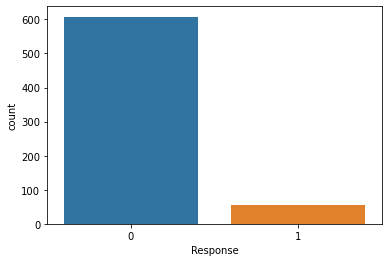

In [233]:
sns.countplot(x = submission_file.Response)

In [234]:
submission_file.to_csv('my_first_submission.csv', index = False)